# データ解析のための統計モデリング入門 第８章

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math
import random
plt.style.use("ggplot")
%matplotlib inline

In [2]:
#20個体を調べた結果。各個体につき、8個の種子があって生存種子数がデータy. 生存確率を求めたい。

In [3]:
y = [4, 3, 4, 5, 5, 2, 3, 1, 4, 0, 1, 5, 5, 6, 5, 4, 4, 5, 3, 4]

In [4]:
len(y)

20

(array([1., 2., 1., 3., 6., 6., 1.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

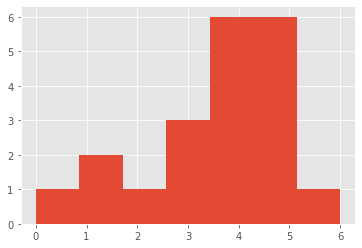

In [5]:
plt.hist(y, bins = 7)

In [6]:
q_list = np.linspace(0.001, 0.999, 1000)

In [7]:
#尤度直接計算

q_max = 0
L_max = 0
L_list = []

for q in q_list:
    L = 1 

    for i in range(20):
        L = L * binom.pmf(y[i], 8, q)
    
    L_list.append(L)
    
    if L > L_max:
        L_max = L
        q_max = q

print(L_max)
print(q_max)

4.0393454372495295e-17
0.45654354354354354


Text(0.5, 1.0, 'Likelihood calculation')

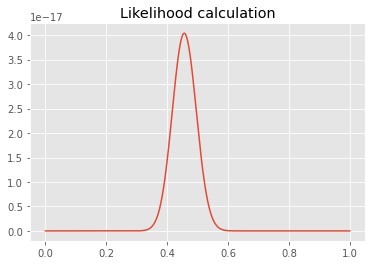

In [8]:
plt.plot(q_list, L_list)
plt.title('Likelihood calculation')

In [9]:
# 対数尤度計算

logL_list = []
logL_max = -100000
logL_q_max = 0

def log_liklihood(y, q):
    Sum = 0
    for i in range(20):
        Sum = Sum + y[i]*math.log(q) + (8 - y[i]) * math.log(1 - q)
    return Sum

for q in q_list:
    logL = log_liklihood(y, q)
    logL_list.append(logL)
    
    if logL > logL_max:
        logL_max = logL
        logL_q_max = q
        
print(logL_max)
print(logL_q_max)

-110.29029269515785
0.45654354354354354


Text(0.5, 1.0, 'Log Likelihood calculation')

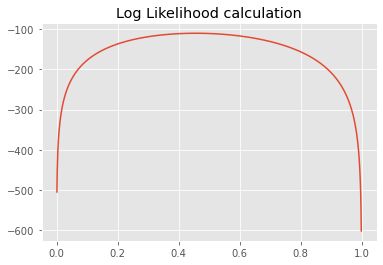

In [10]:
plt.plot(q_list, logL_list)
plt.title('Log Likelihood calculation')

In [17]:
q_init = random.uniform(0, 1)
print('q_init: ', q_init)

mcs = 10000
delta = 0.01

q = q_init
q_mcs_list = []

for m in range(mcs):
    q_mcs_list.append(q)
    if random.uniform(0, 1) > 0.5: #go up
        logL = log_liklihood(y, q)
        test_logL = log_liklihood(y, q + delta)
        if test_logL > logL:
            q = q + delta
        else:
            r = math.exp(log_liklihood(y, q + delta)-log_liklihood(y, q))
            if random.uniform(0, 1) < r:
                q = q + delta
    else: #go down
        logL = log_liklihood(y, q)
        test_logL = log_liklihood(y, q - delta)
        if test_logL > logL:
            q = q - delta
        else:
            r = math.exp(log_liklihood(y, q - delta)-log_liklihood(y, q))
            if random.uniform(0, 1) < r:
                q = q - delta

print('final q: ', q)

q_init:  0.7895317940920804
final q:  0.4695317940920801


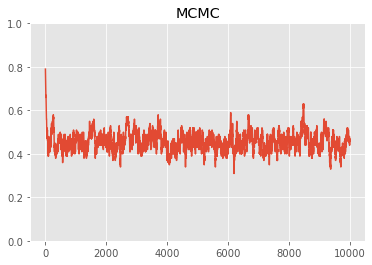

In [18]:
plt.plot(q_mcs_list)
plt.ylim(0, 1)
plt.title('MCMC')
plt.show()

In [19]:
burn_in = math.floor(mcs/5)

q_mcs_list_to_use = q_mcs_list[burn_in:]
mcmc_average = sum(q_mcs_list_to_use)/len(q_mcs_list_to_use)
print('mcmc_average after burn-in: ', mcmc_average)

mcmc_average after burn-in:  0.45518679409207613


Text(0.5, 1.0, 'MCMC after burn-in')

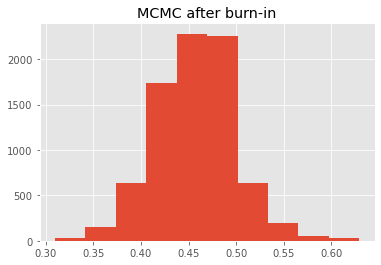

In [20]:
plt.hist(q_mcs_list_to_use)
plt.title('MCMC after burn-in')